In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
base = pd.read_csv('/content/unicorns at july end  - in july end.csv')

In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1178 non-null   object
 1   Valuation ($B)  1178 non-null   object
 2   Date Joined     1178 non-null   object
 3   Country         1178 non-null   object
 4   City            1178 non-null   object
 5   Industry        1178 non-null   object
 6   Investors       1160 non-null   object
dtypes: object(7)
memory usage: 64.5+ KB


In [7]:
base.isnull().sum()

Company            0
Valuation ($B)     0
Date Joined        0
Country            0
City               0
Industry           0
Investors         18
dtype: int64

In [9]:
base.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [10]:
base.shape

(1178, 7)

In [13]:
#traduzindo titulo das colunas com rename
base.rename(columns = {
    'Company': 'Empresa', 
    'Valuation ($B)': 'Valor $', 
    'Date Joined': 'Data de Adesão',
    'Country': 'Pais', 
    'City ': 'Cidade',
    'Industry': 'Setor',
     'Investors': 'Investidor'
}, inplace=True)

In [14]:
base.head()

,Empresa,Valor $,Data de Adesão,Pais,City,Setor,Investidor
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [15]:
base['Mes'] = pd.DatetimeIndex(base['Data de Adesão']).month
base['Ano'] = pd.DatetimeIndex(base['Data de Adesão']).year
base.head()

,Empresa,Valor $,Data de Adesão,Pais,City,Setor,Investidor,Mes,Ano
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [32]:
base['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Partners, DST 

In [34]:
base['Setor'].count()

1178

In [35]:
base['Setor'].value_counts()

Fintech                                                               237
Internet software & services                                          222
E-commerce & direct-to-consumer                                       103
Health                                                                 93
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  39
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

In [47]:
analise = round(base['Setor'].value_counts(normalize=True) * 100, 2)

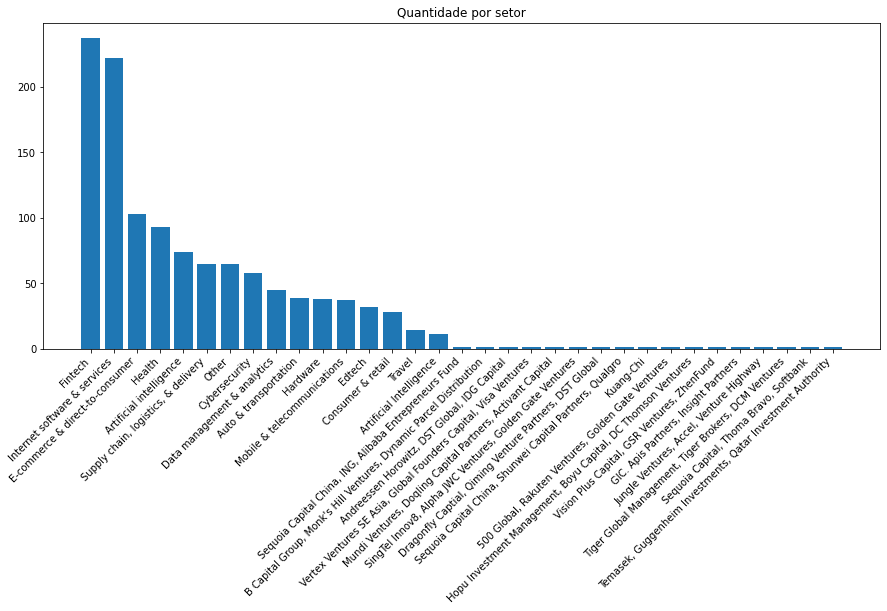

In [46]:
plt.figure(figsize=(15,6))
plt.title('Quantidade por setor')
plt.bar(base['Setor'].value_counts().index, base['Setor'].value_counts())
plt.xticks(rotation=45, ha='right');

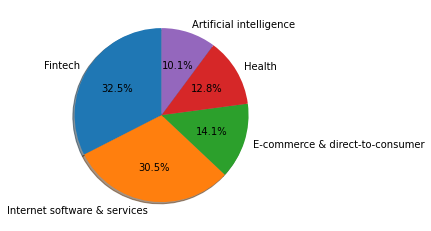

In [60]:
plt.pie(
    analise.head(5),
    labels=analise.index[0:5],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [63]:
#convertendo para data
base['Data de Adesão'] = pd.to_datetime(base['Data de Adesão'])
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Empresa         1178 non-null   object        
 1   Valor $         1178 non-null   object        
 2   Data de Adesão  1178 non-null   datetime64[ns]
 3   Pais            1178 non-null   object        
 4   City            1178 non-null   object        
 5   Setor           1178 non-null   object        
 6   Investidor      1160 non-null   object        
 7   Mes             1178 non-null   int64         
 8   Ano             1178 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 83.0+ KB


In [77]:
base['Id'] = base.index

In [79]:
base.head()

,Empresa,Valor $,Data de Adesão,Pais,City,Setor,Investidor,Mes,Ano,Id
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017,0
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012,1
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018,2
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014,3
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018,4


In [85]:
qtde_pais = base.groupby(by=['Pais', 'Mes', 'Ano', 'Empresa']).count()['Id'].reset_index()

qtde_pais

,Pais,Mes,Ano,Empresa,Id
0,Argentina,8,2021,Uala,1
1,Australia,1,2018,Canva,1
2,Australia,3,2019,Airwallex,1
3,Australia,3,2022,Immutable,1
4,Australia,3,2022,LinkTree,1
...,...,...,...,...,...
1173,United States,12,2021,Turing,1
1174,United States,12,2021,Veho,1
1175,United States,12,2021,YipitData,1
1176,Vietnam,10,2021,Sky Mavis,1


In [88]:
qtde_pais.loc[qtde_pais['Pais'] == 'Brazil']

,Pais,Mes,Ano,Empresa,Id
16,Brazil,1,2020,Loft,1
17,Brazil,1,2021,MadeiraMadeira,1
18,Brazil,2,2022,Neon,1
19,Brazil,5,2022,Dock,1
20,Brazil,6,2019,Loggi,1
21,Brazil,7,2018,Movile,1
22,Brazil,8,2021,Nuvemshop,1
23,Brazil,8,2021,Unico,1
24,Brazil,9,2019,QuintoAndar,1
25,Brazil,9,2021,CloudWalk,1


In [101]:
base['Valor $'] = pd.to_numeric(base['Valor $'].apply(lambda linha: linha.replace("$","")), errors='coerce')
base.head()

AttributeError: ignored

In [102]:
base.head()

,Empresa,Valor $,Data de Adesão,Pais,City,Setor,Investidor,Mes,Ano,Id
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017,0
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012,1
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018,2
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014,3
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018,4


In [105]:
totalvalor = base.groupby(by=['Pais']).sum()['Valor $'].reset_index()

In [113]:
maioresvalores = totalvalor.sort_values('Valor $', ascending=False)
maioresvalores

,Pais,Valor $
46,United States,2064.39
9,China,673.09
45,United Kingdom,205.45
20,India,197.12
18,Germany,78.88
17,France,58.42
1,Australia,54.40
7,Canada,49.23
23,Israel,45.72
6,Brazil,40.08


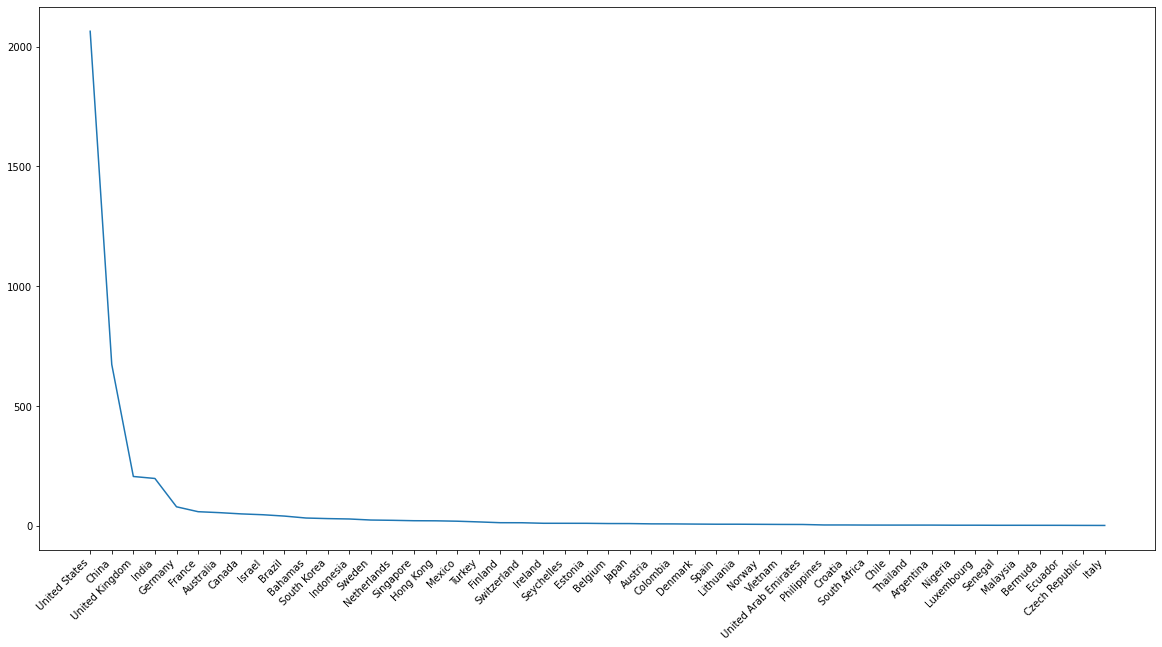

In [119]:
plt.figure(figsize=(20,10))
plt.plot(maioresvalores['Pais'], maioresvalores['Valor $'])
plt.xticks(rotation=45, ha='right');

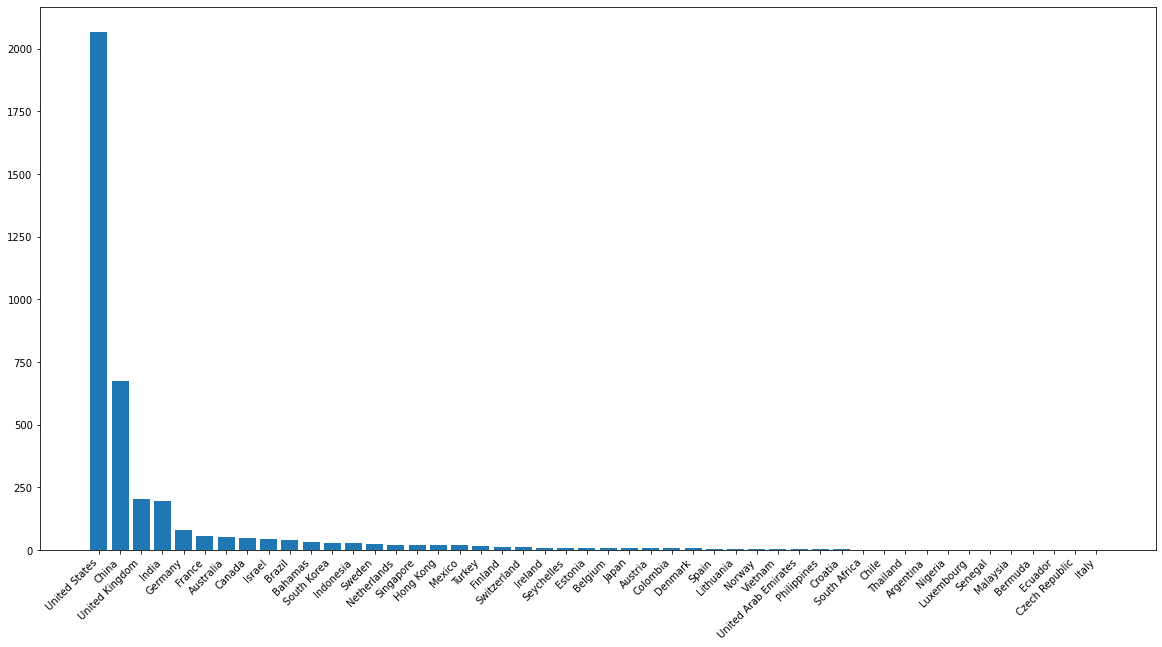

In [123]:
plt.figure(figsize=(20,10))
plt.bar(maioresvalores['Pais'], maioresvalores['Valor $'])
plt.xticks(rotation=45, ha='right')
plt.show()

In [124]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Empresa         1178 non-null   object        
 1   Valor $         1177 non-null   float64       
 2   Data de Adesão  1178 non-null   datetime64[ns]
 3   Pais            1178 non-null   object        
 4   City            1178 non-null   object        
 5   Setor           1178 non-null   object        
 6   Investidor      1160 non-null   object        
 7   Mes             1178 non-null   int64         
 8   Ano             1178 non-null   int64         
 9   Id              1178 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 92.2+ KB
